## Import libraries

In [8]:
import random

from tqdm.notebook import tqdm
import numpy as np
import pickle
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from embedding_model import EmbeddingModel

## Define initial variables

In [5]:
IMGS_FOLDER = 'flickr_images/15K Nocturna Valencia Banco Mediolanum/'
EMBEDDINGS_PATH = 'flickr_images/15K_Nocturna_Valencia_Banco_Mediolanum_embeddings.pkl'
CSV_INFO = 'flickr_images/15K Nocturna Valencia Banco Mediolanum_info.csv'

## Load model

In [6]:
embed_model = EmbeddingModel()

cpu


## Load image embeddings

In [7]:
# Load image embeddings from disk. Each item of the dict will contain 
# the name of the image as a key, and the numpy array of the embedding as a value

with open(EMBEDDINGS_PATH, 'rb') as handle:
    embed_dict = pickle.load(handle)

print('Number of items: ', len(embed_dict.keys()))
print(list(embed_dict.keys())[:5])

img_names_list = list(embed_dict.keys())
img_embeddings_np = np.array(list(embed_dict.values()))
print('embeddings_np.shape: ', img_embeddings_np.shape)

## Make a query and display images from local

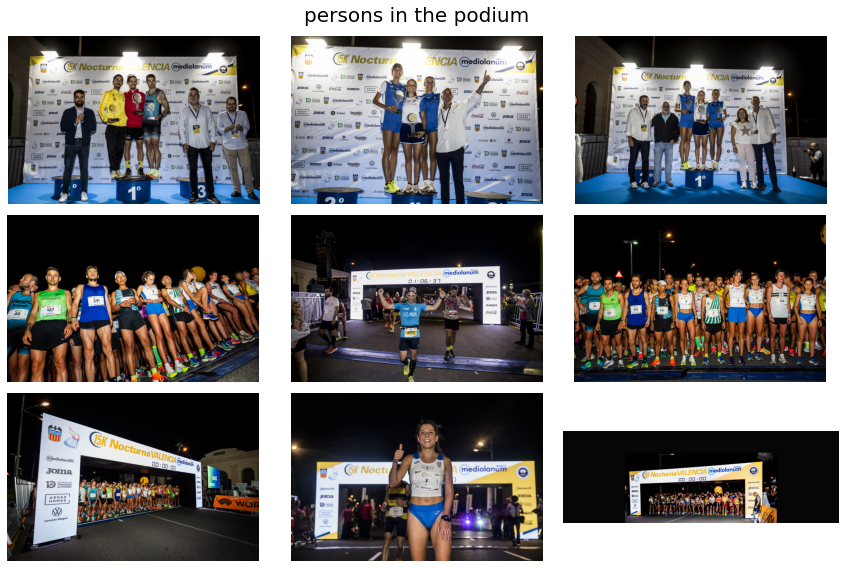

In [11]:
text_search = 'persons in the podium'

indexes = embed_model.get_similar_images_indexes(img_embeddings_np, text_search, n=9)

target_img_filenames = [img_names_list[index] for index in indexes]
target_img_paths = [(IMGS_FOLDER + img_name) for img_name in target_img_filenames]

fig, axes = plt.subplots(3,3, figsize=(12,8), facecolor='white')
for i, img in enumerate(target_img_paths):
    img = Image.open(img)

    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].axis('off')

plt.suptitle(text_search, fontsize=20)
plt.savefig('app_example.png', bbox_inches='tight', transparent=False)

plt.tight_layout()
plt.show()

## Make a query and display images from url

In [17]:
# Load csv file

imgs_info_df = pd.read_csv(CSV_INFO)
print(imgs_info_df.shape)
imgs_info_df.head()

(909, 2)


,filename,url
0,Foto portada_52407167060,https://live.staticflickr.com/65535/5240716706...
1,Foto portada 15K Nocturna Valencia Banco Medio...,https://live.staticflickr.com/65535/5240670392...
2,foto arco completo 15k_52406985814,https://live.staticflickr.com/65535/5240698581...
3,2218-15KNocturna-2022-609_52405506147,https://live.staticflickr.com/65535/5240550614...
4,2218-15KNocturna-2022-607_52405506202,https://live.staticflickr.com/65535/5240550620...


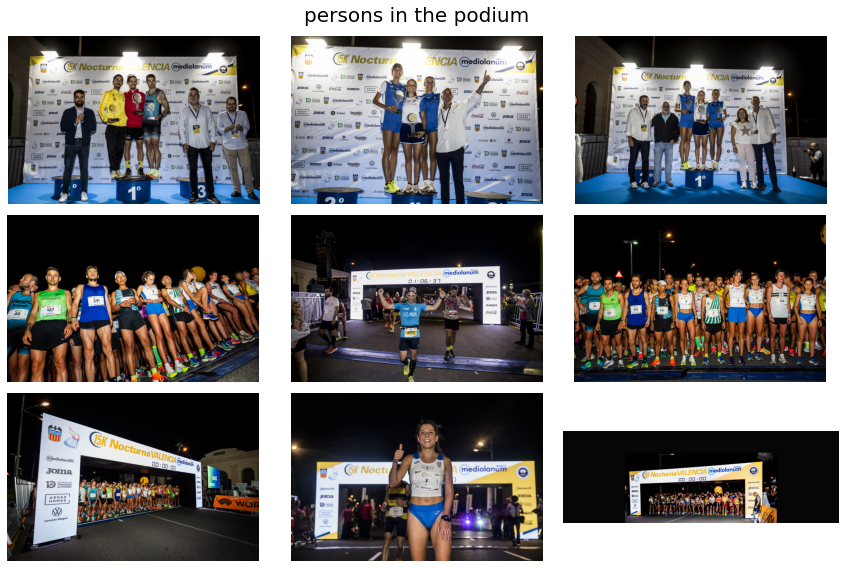

In [19]:
import requests
from io import BytesIO

text_search = 'persons in the podium'

indexes = embed_model.get_similar_images_indexes(img_embeddings_np, text_search, n=9)

target_img_filenames = [img_names_list[index] for index in indexes]

target_urls = []
for img_name in target_img_filenames:
    item = imgs_info_df[imgs_info_df['filename'] == img_name.rsplit('.', 1)[0]]
    target_urls.append(item['url'].values[0])

fig, axes = plt.subplots(3,3, figsize=(12,8), facecolor='white')
for i, url in enumerate(target_urls):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].axis('off')

plt.suptitle(text_search, fontsize=20)
plt.tight_layout()
plt.show()